<a href="https://colab.research.google.com/github/YongjunByun/KSA_projects/blob/main/module12/word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 46.2MB/s 
     |████████████████████████████████| 92kB 7.4MB/s 
     |████████████████████████████████| 450kB 36.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f271da29910>)

In [ ]:
train_data = pd.read_table('ratings.txt')

In [ ]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
print(len(train_data))

200000


In [ ]:
print(train_data.isnull().values.any())

True


In [ ]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) 

False


In [ ]:
print(len(train_data))

199992


In [ ]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


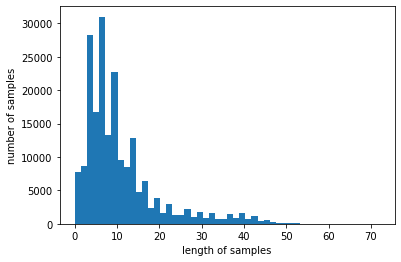

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
tokenized_data[:5]

[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'],
 ['디자인',
  '을',
  '배우다',
  '학생',
  '외국',
  '디자이너',
  '그',
  '일군',
  '전통',
  '을',
  '통해',
  '발전',
  '문화',
  '산업',
  '부럽다',
  '사실',
  '우리나라',
  '에서도',
  '그',
  '어렵다',
  '시절',
  '끝',
  '까지',
  '열정',
  '을',
  '지키다',
  '노라노',
  '같다',
  '전통',
  '있다',
  '저',
  '같다',
  '사람',
  '꿈',
  '을',
  '꾸다',
  '이루다',
  '나가다',
  '수',
  '있다',
  '것',
  '감사하다'],
 ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '하나', '없다', '최고'],
 ['오다',
  '연기',
  '진짜',
  '개',
  '쩔다',
  '지루하다',
  '생각',
  '몰입',
  '보다',
  '그렇다',
  '이렇다',
  '진짜',
  '영화',
  '지'],
 ['안개', '자욱하다', '밤하늘', '뜨다', '있다', '초승달', '같다', '영화']]

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
model.wv.vectors.shape

(16477, 100)

In [ ]:
print(model.wv.most_similar("최민식"))

[('크리스찬', 0.8363163471221924), ('박중훈', 0.836005687713623), ('최민수', 0.8339719772338867), ('이민호', 0.8275424242019653), ('류덕환', 0.8268847465515137), ('김수현', 0.8255105018615723), ('안성기', 0.8242944478988647), ('공효진', 0.8242559432983398), ('유다인', 0.8142107725143433), ('이정재', 0.8137110471725464)]


In [ ]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.874361515045166), ('무협', 0.8589280843734741), ('느와르', 0.8586536645889282), ('블록버스터', 0.8502134680747986), ('호러', 0.8498818874359131), ('물의', 0.8406360149383545), ('무비', 0.8394690752029419), ('정통', 0.8293877840042114), ('로코', 0.8177213072776794), ('블랙', 0.8114105463027954)]


In [ ]:
# 두 형태소간의 거리
print(model.wv.distance("최민식", "히어로"))
print(model.wv.distance("빌런", "악당"))


0.7822517901659012
0.4774961471557617


In [ ]:
# 형태소의 word vector 
print(model.wv.get_vector("최민식"))

[ 0.09509525 -0.1651333  -0.47594047  0.27924955 -0.12943289  0.01164279
 -0.4306856   0.04057529 -0.13256843  0.16663787 -0.04486988 -0.03527327
 -0.06389087 -0.38229918 -0.03322003 -0.19394812  0.01926909  0.05022806
 -0.27851924 -0.18920258 -0.06666894 -0.32433212  0.22342496  0.00280668
  0.08269455 -0.03548232 -0.01031304 -0.28149354  0.11003402 -0.03522303
  0.12591723  0.01140826 -0.1451468   0.26767293 -0.06159196 -0.12247436
  0.1280034  -0.15854503 -0.00067529  0.10309967 -0.37593114  0.17781542
 -0.09572799  0.01575969 -0.33135226 -0.20757511  0.1838328   0.10876578
 -0.13423513 -0.1771253  -0.11410369 -0.04782078 -0.03022718 -0.34553713
  0.03696179 -0.08170746 -0.19281955  0.16353999 -0.06007344  0.00078241
  0.03299958 -0.07096203 -0.00603645 -0.17348973  0.0438057  -0.19379301
  0.1260856   0.3304173   0.23322605 -0.10518943 -0.05756919 -0.098584
 -0.09227011 -0.38282138 -0.1512238  -0.3532046   0.04300698 -0.36303896
  0.31067067  0.22423626  0.17126732  0.01272766  0.0